<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/7_2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%95%EA%B7%9C%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-07-2-linear_regression_without_min_max.py

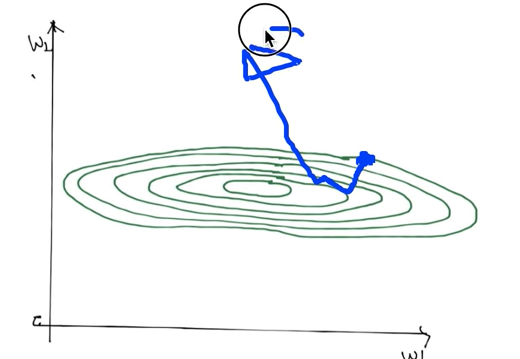![image.png]()

In [1]:
import tensorflow as tf
import numpy as np

# 데이터값들의 차이가 너무 큰경유
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [2]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=4))
tf.model.add(tf.keras.layers.Activation('linear'))
tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))

In [4]:
history = tf.model.fit(x_data, y_data, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 587ms/step - loss: 292990222336.0000
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 321902592927285579921626218102784.0000
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: inf
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: inf
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: inf
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: nan
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: nan
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: nan
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: nan
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: nan
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: nan
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: nan
Epoch 13/100
1/1 [=================

In [3]:
tf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
print(history.history['loss']) # loss == nan

[292990222336.0, 3.2190259292728558e+32, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


# 데이터 정규화

데이터 폭이 큰 문제를 해결하기 위해 정규화를 시켜주어야 한다

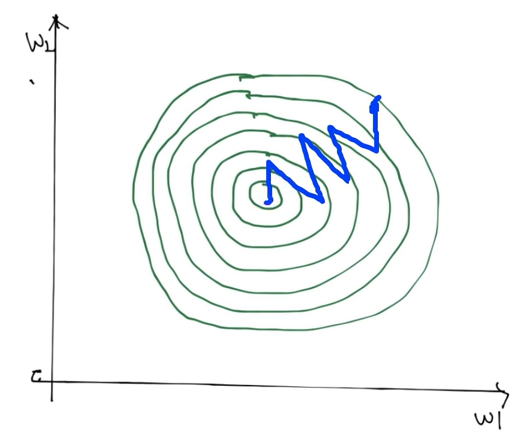

In [6]:
# 최대 최소값을 1과 0 기준으로 데이터 정규화

def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [7]:
xy = min_max_scaler(xy)
print(xy)

[[0.99999999 0.99999999 0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881782 0.83755791]
 [0.54412549 0.50274824 0.57608696 0.606468   0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.42582389 0.30434783 0.58504805 0.42624401]
 [0.49556179 0.42582389 0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


In [8]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [9]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=4))
tf.model.add(tf.keras.layers.Activation('linear'))
tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))

In [10]:
history = tf.model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 285ms/step - loss: 1.2896
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.2001
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.1172
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.0405
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.9696
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.9039
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.8431
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.7868
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7347
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6864
Epoch 11/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6418
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6004
Epoch 13/1000
1/1 [========================

In [11]:
tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
predictions = tf.model.predict(x_data)
score = tf.model.evaluate(x_data, y_data)

1/1 [==============================] - 0s 195ms/step - loss: 0.0050


In [13]:
print('Prediction: \n', predictions)
print('Cost: ', score)

Prediction: 
 [[0.98953104]
 [0.76050055]
 [0.59858567]
 [0.3761436 ]
 [0.5709989 ]
 [0.54867184]
 [0.19516818]
 [0.04656193]]
Cost:  0.005007151048630476
